In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,string
from pylab import *
from pyeeg import bin_power
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline


In [7]:
#here split the data to eyeclose and eyeopen from the raw data 
chunkList = []
with open('eyeclose.txt', 'r') as fc:
    datalist = fc.readlines()
    for line in datalist:
        x= line.split("\n")
        del x[-1]
        chunkList.append(x)
dataListArray = []
for k in chunkList:
    dataList = str(k).replace('[','').replace(']','').replace('\'','').split(' ')
    dataListArray.append(dataList)
for j in range(len(dataListArray)):
    for i in range(len(dataListArray[j])):
        filePath = 'EEG\eyeclose\Teyeclose' + str(j+1) + '.txt'
        with open (filePath,'a') as f:
            f.write(dataListArray[j][i]+'\n')

chunkList1 = []
with open('eyeopen.txt', 'r') as fo:
    datalist1 = fo.readlines()
    for line in datalist1:
        x= line.split("\n")
        del x[-1]
        chunkList1.append(x)
dataListArray1 = []
for k1 in chunkList1:
    dataList1 = str(k1).replace('[','').replace(']','').replace('\'','').split(' ')
    dataListArray1.append(dataList1)
for j in range(len(dataListArray1)):
    for i in range(len(dataListArray1[j])):
        filePath = 'EEG\eyeopen\Teyeopen' + str(j+1) + '.txt'
        with open (filePath,'a') as fo:
            fo.write(dataListArray1[j][i]+'\n')


In [10]:
# here generating the feature using bin_power function for generationg and extracting Alpha signal
with open('resultc.txt','a') as resultc:
    for i in range(40):
        X = open("EEG\eyeclose\Teyeclose"+str(i+1)+".txt","r")
        power , power_ratio = bin_power(list(X)[-512*3:],[0.5,4,7,12,30], 1024)
        signal_splitted =str(power).split()
        alpha_Signal = signal_splitted[3]
        resultc.write(str(alpha_Signal)+'\n')

with open('resulto.txt', 'a') as resulto:
    for i in range(40):
        X = open("EEG\eyeopen\Teyeopen" + str(i + 1) + ".txt", "r")
        power, power_ratio = bin_power(list(X)[-512 * 3:], [0.5, 4, 7, 12, 30], 1024)
        signal_splitted = str(power).split()
        alpha_Signal = signal_splitted[3]
        resulto.write(str(alpha_Signal) + '\n')

In [11]:
#here the machine learning Algorithim started . 
#read alpha signal for both eyes close and open 
open_ds = pd.read_csv("resulto.txt")
close_ds = pd.read_csv("resultc.txt")

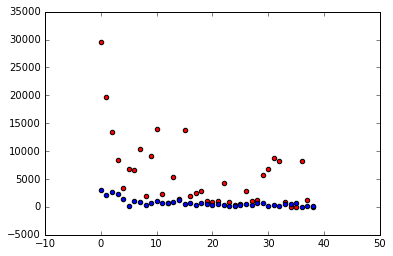

In [15]:
#again this is for me , it is not important for the final code 
#This is to plot the points
plt.scatter(open_ds.index, open_ds, c="red")
plt.scatter(close_ds.index, close_ds, c="blue")